# <center>__Assignment 1__ </center>

## <center>__Ben Karabinus__</center>

## <center>__COMP 4432, Summer Quarter 2022__</center>



In [1]:
"""import necessary libraries"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Assignment 1, Part 1

Data Loading and Preparation. Load the diabetes dataset
into two numpy arrays: one for the feature set and one for the target. Pick a
single feature to try to predict the target (disease progression). Document the
reason you chose the feature you did. Break your single feature and target sets
into training and test sets with the last 20 rows being in the test set.

In [2]:
"""load diabetes dataset from scikit-learn"""

diabetes_bunch = data.load_diabetes(as_frame=True)
diabetes_df = diabetes_bunch['data']
# create data frame for visualization
diabetes_df['disease_progression'] = diabetes_bunch['target']
# create arrays for fitting model
X = np.array(diabetes_df.iloc[:, :-1])
#flatten target array
y = np.array(diabetes_df.iloc[:, -1:]).ravel()


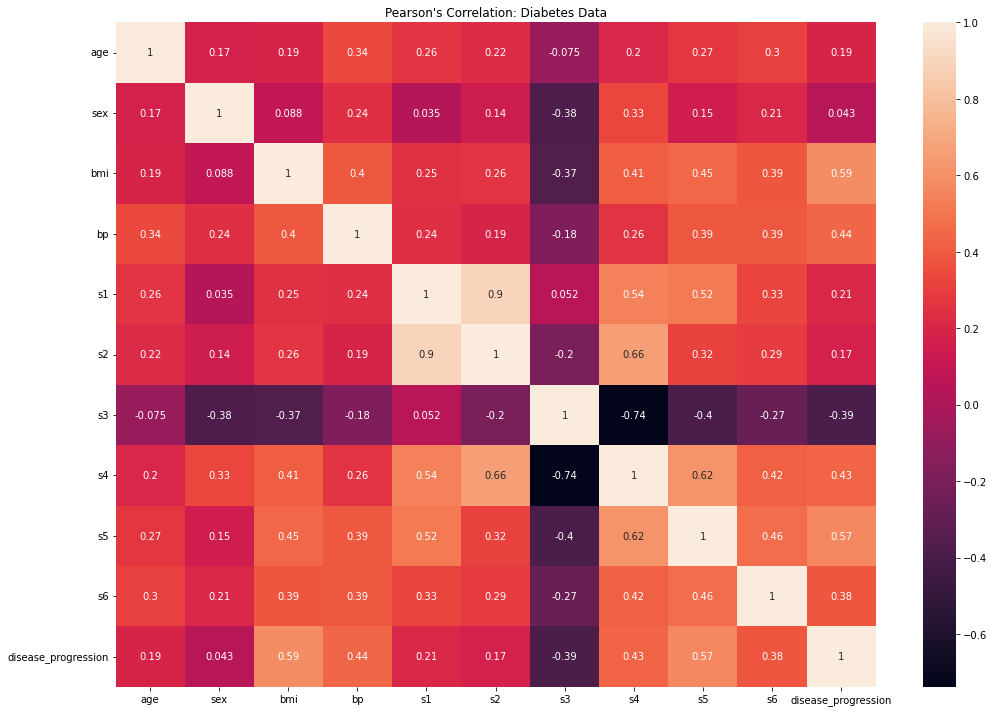

In [3]:
"""plot pearson's correlation to help in selecting a single predictor"""

fig, ax = plt.subplots(figsize=(15, 10))
plt.title('Pearson\'s Correlation: Diabetes Data')
sns.heatmap(diabetes_df.corr(), annot=True)
plt.tight_layout()

Plotting Pearson's correlation for the Diabetes dataset shows that the feature bmi (body mass index) appears to have the strongest relationship with the target, disease_progression. To further validate this assumption we can use the f_regression() function available for import from scikit-learn.

In [4]:
"""apply f_regression() to diabetes data and print results"""
f_reg = f_regression(X, y)
f_reg

(array([ 16.10137401,   0.81742349, 230.65376449, 106.52013086,
         20.71056745,  13.74607917,  81.23965868, 100.06926441,
        207.27119362,  75.3996832 ]),
 array([7.05568615e-05, 3.66429295e-01, 3.46600645e-42, 1.64937205e-22,
        6.92071179e-06, 2.35984810e-04, 6.16286470e-18, 2.30425328e-21,
        8.82645896e-39, 7.58008327e-17]))

Running f_regression() further validates that bmi is a strong predictor of the target, disease progression. The first array in the above output specifies the calculated F-statistic and the second array specifies the corresponding p-value. The bmi predictor (value in position 2 in each array) has both the greatest F-statistic and most significant p-value of any predictor.

In [5]:
"""
split the data into training and test sets.
sklearn train, test, split will not be used since the target is last 20 records
instead array slicing will be used to segment data
"""
X_train = X[:-20, 2:3]
y_train = y[:-20]
X_test = X[-20:, 2:3]
y_test = y[-20:]

Assignment 1, Part 2: Model Training. Instantiate a linear regression model, and
train it with your single feature and target sets.

In [6]:
"""
instantiate then fit ordinary least squares regression model sklearn
"""

ols = LinearRegression()
ols.fit(X_train, y_train)

LinearRegression()

Assignment 1, Part 3: Prediction and Measurement. List the first 10 predictions
on your single feature training set. Print out the feature coefficient and the root
mean squared error of your model.

In [7]:
"""make predictions on the test set then print the first 10 predictions"""
predictions = ols.predict(X_test)
predictions[0:10]

array([225.9732401 , 115.74763374, 163.27610621, 114.73638965,
       120.80385422, 158.21988574, 236.08568105, 121.81509832,
        99.56772822, 123.83758651])

In [10]:
"""
print model coefficient, root mean squared error RMSE, and R-squared
"""

coefficient = ols.coef_[0]
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)
print("Coefficient: {}".format(coefficient))
print("Root Mean Squared Error: {:.2f}".format(rmse))
print("R-squared: {:.2f}".format(r2))


Coefficient: 938.2378612513521
Root Mean Squared Error: 50.48
R-squared: 0.47


Assignment 1, Part 4: Visualization. Print out a scatter plot with the feature you
chose on the x-axis, and progression on the y-axis. Plot the regression line on
this same graph with appropriate labels on each axis.

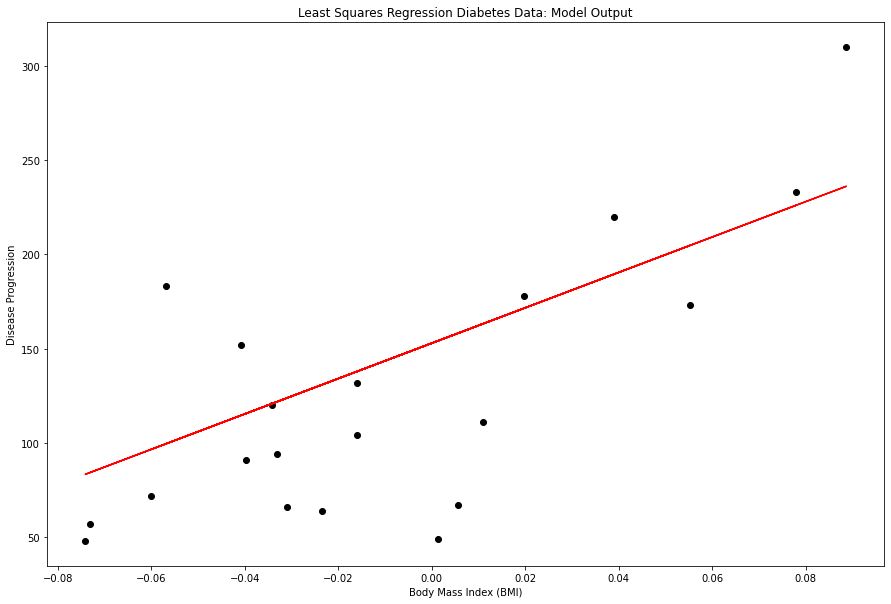

In [12]:
"""plot model output"""
fig, ax =plt.subplots(figsize=(15, 10))
plt.title('Least Squares Regression Diabetes Data: Model Output')
plt.ylabel('Disease Progression')
plt.xlabel('Body Mass Index (BMI)')
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, predictions, color='Red')